### **Libraries**

In [1]:
import numpy as np  #for the e_logarithmic filter (and also some other mathematical operations)
import matplotlib.pyplot as plt #to plot losses of models
import pandas as pd  #for managing the dataframe
from numpy.fft import fft, ifft, fftfreq  #for computing the one-dimensional discrete Fourier Transform. refer to the website:https://numpy.org/doc/stable/reference/routines.fft.html
from scipy.optimize import curve_fit  #for minimizing (or maximizing) objective functions,
from sklearn.metrics import r2_score  #implements functions assessing prediction error for specific purposes.
from sklearn.metrics import mean_squared_error   #for evaluating model performances
from sklearn import preprocessing  #package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

## Data

## Connecting to Data in Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive') #mounting the google drive

Mounted at /content/drive


In [3]:
!ls '/content/drive' #listing the contents of the Drive folder

MyDrive  Shareddrives


### Reading Data using Pandas

In [4]:
df = pd.read_csv('/content/drive/MyDrive/FFG - Fourier Function Regression Generator/proceedit 20220426 iLab - dySPP- S&P500-MPN10P-Fourier analysis and trading - raw_features_data.csv')  # to import and read CSV File into Python

In [5]:
df.columns = [x.lower() for x in df.columns]
print(df.columns)
df.info()
df.drop(labels=[5605], axis = 0, inplace = True) # Optional

Index(['id', 'uuid', 'dcp_date_current_period',
       'opcp_open_price_current_period', 'hpcp_high_price_current_period',
       'lpcp_low_price_current_period', 'cpcp_close_price_current_period',
       'acpcp_adjusted_close_price_current_period',
       'vtcp_volume_of_transactions_current_period'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          5606 non-null   int64  
 1   uuid                                        0 non-null      float64
 2   dcp_date_current_period                     5606 non-null   object 
 3   opcp_open_price_current_period              5606 non-null   object 
 4   hpcp_high_price_current_period              5606 non-null   object 
 5   lpcp_low_price_current_period               5606 non

In [6]:
data = df.drop(labels = [5604], axis = 0) # Optional
data

,id,uuid,dcp_date_current_period,opcp_open_price_current_period,hpcp_high_price_current_period,lpcp_low_price_current_period,cpcp_close_price_current_period,acpcp_adjusted_close_price_current_period,vtcp_volume_of_transactions_current_period
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000"
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000"
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000"
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000"
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000"
...,...,...,...,...,...,...,...,...,...
5599,5600,NaN,2022-04-06,"4,494.17","4,503.94","4,450.04","4,481.15","4,481.15","4,137,080,000"
5600,5601,NaN,2022-04-07,"4,474.65","4,521.16","4,450.30","4,500.21","4,500.21","4,054,010,000"
5601,5602,NaN,2022-04-08,"4,494.15","4,520.41","4,474.60","4,488.28","4,488.28","3,453,040,000"
5602,5603,NaN,2022-04-11,"4,462.64","4,464.35","4,408.38","4,412.53","4,412.53","3,452,540,000"


## Data Cleaning

In [7]:
#Open_price
open_price = data['opcp_open_price_current_period'].apply(lambda x: x.replace(',', ''))
open_price = open_price.apply(lambda x: float(x))


#High_price
high_price = data['hpcp_high_price_current_period'].apply(lambda x: x.replace(',', ''))
high_price = high_price.apply(lambda x: float(x))

#Low_price
low_price = data['lpcp_low_price_current_period'].apply(lambda x: x.replace(',', ''))
low_price = low_price.apply(lambda x: float(x))

#Close_price
close_price = data['cpcp_close_price_current_period'].apply(lambda x: x.replace(',', ''))
close_price = close_price.apply(lambda x: float(x))

#Average_price
average_price = data['acpcp_adjusted_close_price_current_period'].apply(lambda x: x.replace(',', ''))
average_price = average_price.apply(lambda x: float(x))

#Volume
volume_price = data['vtcp_volume_of_transactions_current_period'].apply(lambda x: x.replace(',', ''))
volume_price = volume_price.apply(lambda x: float(x))


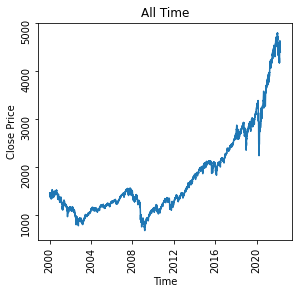

In [8]:
#plotting data by date
data['dcp_date_current_period'] = pd.to_datetime(df['dcp_date_current_period'])
data['day'] = pd.to_datetime(df['dcp_date_current_period']).dt.day

plt.figure(figsize=(10,4))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(data['dcp_date_current_period'], average_price) # Time vs Adjusted Close Price
ax1.set_title('All Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)

plt.show()

### **Generalizing Fourier Series Function**

### Creating slide window

In [9]:
from datetime import datetime
#datetime_object = datetime.strptime('2000-01-03', '%Y-%m-%d')

In [10]:
def str2date(string_date):

  datetime_object = datetime.strptime(string_date,'%Y-%m-%d')  # strptime - string to date, strftime - date to string
  return datetime_object

In [12]:
df['dcp_date_current_period']=df['dcp_date_current_period'].apply(str2date)

In [13]:
# Set time from beginning equals 0 
data['day_from_beginning'] = df['dcp_date_current_period'] - df['dcp_date_current_period'][0]
data['day_from_beginning']
days_in_number = data['day_from_beginning']
days_in_number

0         0 days
1         1 days
2         2 days
3         3 days
4         4 days
          ...   
5599   8129 days
5600   8130 days
5601   8131 days
5602   8134 days
5603   8135 days
Name: day_from_beginning, Length: 5604, dtype: timedelta64[ns]

In [14]:
# Each window slides from 1-10, 2-11, 3-12, ...
def window(x,window_size = 10):
  windows = []
  for i in range(len(x)-window_size+1):  # 60-10+1 = 51 i=50
    windows.append(x[i:i+window_size]) # x[50:60]
  return windows

# Price in next 60 days
price_each_10_days = window(average_price[:60])
print(len(price_each_10_days))

# 60 days next 
day_each_10_days = window(data['day'][:60])
print(len(day_each_10_days))

# 60 days next in number

days_60_in_number = window(days_in_number[:60])
print(len(days_60_in_number))

# Price in next 500 days
price_500_days = window(average_price[:500])
print(len(price_500_days))

# 500 days next 
days_500 = window(data['day'][:500])
print(len(days_500))

# 500 days in number
days_500_in_number = window(days_in_number[:500])
print(len(days_500_in_number))

51
51
51
491
491
491


### Creating Fourier and Reversed Fourier function

$$a\times \cos(i\times x) + a[i+n-1]\times sin(i \times x)$$

$$\sqrt{\sum(predictions-targets)^2}/n$$



In [15]:
# Creating Fourier Function
def make_func(numarg):
    def func(x,*a):
        n= int((numarg + 1)/2)
        s= 0
        for i in range(n):
          if i == 0:
            s = a[i]/2
          else:
            s += a[i]*np.cos(i*x) + a[i+n-1]*np.sin(i*x)
        return s
    return func

# Creating Reversed Fourier Function
def reversed_func(x,*a):
  n= int((len(a) + 1)/2)
  s= 0
  for i in range(n):
    if i == 0:
      s = a[i]/2
    else:
      s += a[i]*np.cos(i*x) + a[i+n-1]*np.sin(i*x)
  return s


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### Applying to 60 days

In [16]:
days_60 = []
for i in days_60_in_number:
  day = []
  for j in i:
    day.append(j.days)

  days_60.append(day)


In [17]:
# 3_degree
a = np.zeros(7)
params_3degree = []
for i in range(len(price_each_10_days)):
  params_3degree.append(curve_fit(make_func(len(a)), days_60[i], price_each_10_days[i], a)[0])

y_fit_3degree = []
for i in range(len(price_each_10_days)):
  y_fit_3degree.append(reversed_func(np.array(days_60[i]).reshape(-1,1),*params_3degree[i]))

params_3degree = np.array(params_3degree)
y_fit_3degree = np.array(y_fit_3degree)

rmse for 3 degree: 18.629688249385502
r2 for 3 degree: 0.78709596343336


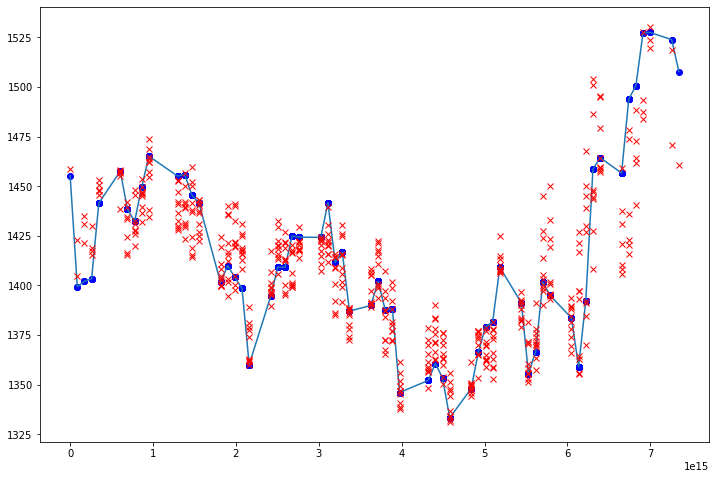

In [18]:
# metrics
#rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
    
rmse_3degree = rmse(y_fit_3degree.reshape(-1),np.array(price_each_10_days).reshape(-1))
print('rmse for 3 degree: ' + str(rmse_3degree))

#r2
r2_3degree = r2_score(np.array(price_each_10_days).reshape(-1),y_fit_3degree.reshape(-1))
print('r2 for 3 degree: ' + str(r2_3degree))


#plot by month
plt.figure(figsize=(12,8))
plt.plot(np.array(days_60_in_number).reshape(-1),np.array(price_each_10_days).reshape(-1),'bo')
plt.plot(days_in_number[:60],average_price[:60])
plt.plot(np.array(days_60_in_number).reshape(-1),y_fit_3degree.reshape(-1),'bx',color = 'red',)
plt.show()

In [19]:
data['day_from_beginning']

0         0 days
1         1 days
2         2 days
3         3 days
4         4 days
          ...   
5599   8129 days
5600   8130 days
5601   8131 days
5602   8134 days
5603   8135 days
Name: day_from_beginning, Length: 5604, dtype: timedelta64[ns]

**Applying to 500 days**

In [20]:
days_500 = []
for i in days_500_in_number:
  day = []
  for j in i:
    day.append(j.days)

  days_500.append(day)

In [21]:
a = np.zeros(7)
params_3degree_500days = []
for i in range(len(price_500_days)):
  params_3degree_500days.append(curve_fit(make_func(len(a)), days_500[i], price_500_days[i], a)[0])

y_fit_3degree_500days = []
for i in range(len(price_500_days)):
  y_fit_3degree_500days.append(reversed_func(np.array(days_500[i]).reshape(-1,1),*params_3degree_500days[i]))

params_3degree_500days = np.array(params_3degree_500days)
y_fit_3degree_500days = np.array(y_fit_3degree_500days)

rmse for 3 degree: 15.892712952885233
r2 for 3 degree: 0.9866012240422555


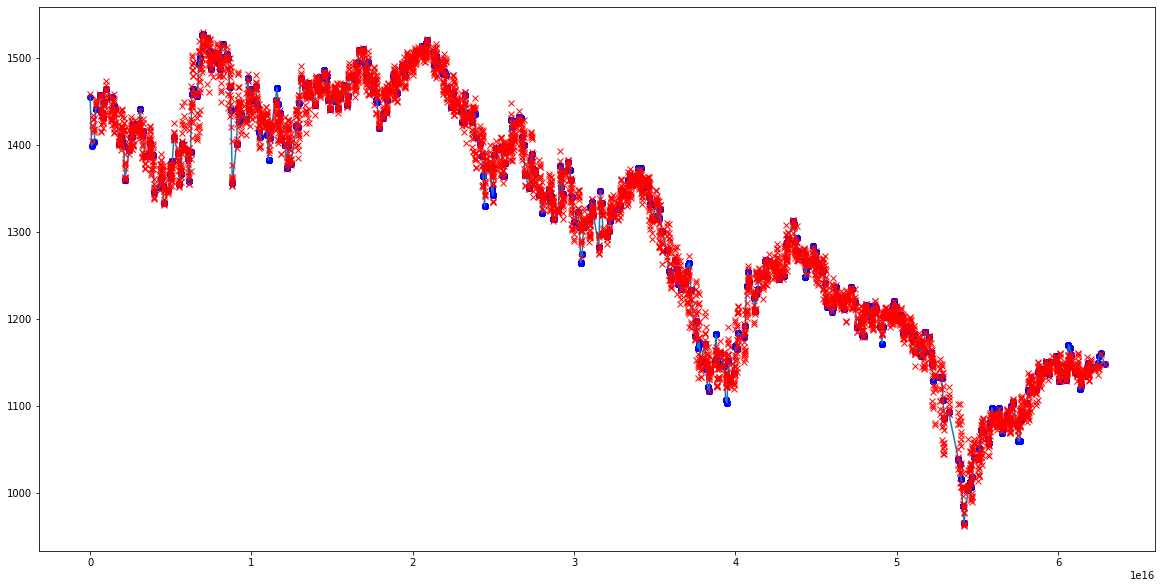

In [34]:
# metrics
#rmse
rmse_3degree = rmse(y_fit_3degree_500days.reshape(-1),np.array(price_500_days).reshape(-1))
print('rmse for 3 degree: ' + str(rmse_3degree))

#r2
r2_3degree = r2_score(np.array(price_500_days).reshape(-1),y_fit_3degree_500days.reshape(-1))
print('r2 for 3 degree: ' + str(r2_3degree))


#plot by month
plt.figure(figsize=(20,10))
plt.plot(np.array(days_500_in_number).reshape(-1),np.array(price_500_days).reshape(-1),'bo')
plt.plot(days_in_number[:500],average_price[:500])
plt.plot(np.array(days_500_in_number).reshape(-1),y_fit_3degree_500days.reshape(-1),'bx',color = 'red',)
plt.show()

### **Applying for the whole data**

In [25]:
len(average_price)

5604

In [26]:
# Price in 5000 days
price_5000_days = window(average_price[:])
print(len(price_5000_days))


# 5000 days in number
days_5000_in_number = window(days_in_number[:])
print(len(days_5000_in_number))

5595
5595


In [27]:
days_5000 = []
for i in days_5000_in_number:
  day = []
  for j in i:
    day.append(j.days)

  days_5000.append(day)

In [28]:
a = np.zeros(7)
params_3degree_5000days = []
for i in range(len(price_5000_days)):
  params_3degree_5000days.append(curve_fit(make_func(len(a)), days_5000[i], price_5000_days[i], a)[0])

y_fit_3degree_5000days = []
for i in range(len(price_5000_days)):
  y_fit_3degree_5000days.append(reversed_func(np.array(days_5000[i]).reshape(-1,1),*params_3degree_5000days[i]))

params_3degree_5000days = np.array(params_3degree_5000days)
y_fit_3degree_5000days = np.array(y_fit_3degree_5000days)

rmse for 3 degree: 19.902240939723576
r2 for 3 degree: 0.9995115860900876


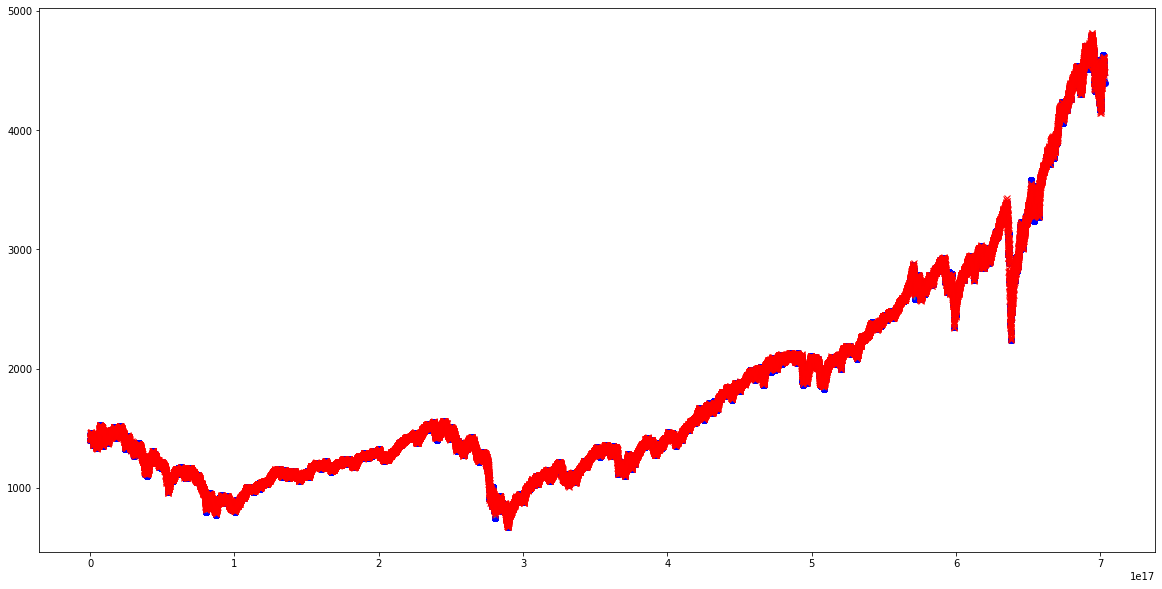

In [36]:
# metrics
#rmse
rmse_3degree = rmse(y_fit_3degree_5000days.reshape(-1),np.array(price_5000_days).reshape(-1))
print('rmse for 3 degree: ' + str(rmse_3degree))

#r2
r2_3degree = r2_score(np.array(price_5000_days).reshape(-1),y_fit_3degree_5000days.reshape(-1))
print('r2 for 3 degree: ' + str(r2_3degree))

#plot by month
plt.figure(figsize=(20,10))
plt.plot(np.array(days_5000_in_number).reshape(-1),np.array(price_5000_days).reshape(-1),'bo')
plt.plot(days_in_number[:5000],average_price[:5000])
plt.plot(np.array(days_5000_in_number).reshape(-1),y_fit_3degree_5000days.reshape(-1),'bx',color = 'red',)
plt.show()

In [32]:
a = np.array(params_3degree_5000days)
a0 = []
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
for i in range(len(params_3degree_5000days)):
  a0.append(params_3degree_5000days[i][0])
  a1.append(params_3degree_5000days[i][1])
  a2.append(params_3degree_5000days[i][2])
  a3.append(params_3degree_5000days[i][3])
  a4.append(params_3degree_5000days[i][4])
  a5.append(params_3degree_5000days[i][5])
  a6.append(params_3degree_5000days[i][6])
a0 = np.array(a0).reshape(-1)
a1 = np.array(a1).reshape(-1)
a2 = np.array(a2).reshape(-1)
a3 = np.array(a3).reshape(-1)
a4 = np.array(a4).reshape(-1)
a5 = np.array(a5).reshape(-1)
a6 = np.array(a6).reshape(-1)

In [ ]:
#d0 = df['dcp_date_current_period']
#d0

In [37]:
data1 = {'A0FFP_a0_fourier_function_parameter_next_10_periods': a0, 'A1FFP_a1_fourier_function_parameter_next_10_periods': a1,'A2FFP_a2_fourier_function_parameter_next_10_periods': a2, 'A3FFP_a3_fourier_function_parameter_next_10_periods': a3,'B1FFP_b1_fourier_function_parameter': a4, 'B2FFP_b2_fourier_function_parameter': a5,'B3FFP_b3_fourier_function_parameter': a6}
coef_result = pd.DataFrame(data = data1)


In [38]:
coef_result

,A0FFP_a0_fourier_function_parameter_next_10_periods,A1FFP_a1_fourier_function_parameter_next_10_periods,A2FFP_a2_fourier_function_parameter_next_10_periods,A3FFP_a3_fourier_function_parameter_next_10_periods,B1FFP_b1_fourier_function_parameter,B2FFP_b2_fourier_function_parameter,B3FFP_b3_fourier_function_parameter
0,2874.841161,11.188859,-0.249856,10.554607,-17.811317,4.420990,6.903147
1,2963.213943,82.499204,47.055951,27.098778,-44.765164,-38.515005,-14.995676
2,2949.550781,62.325922,32.846731,12.482740,-35.594379,-26.238144,-13.899943
3,3076.765687,164.977840,97.092146,49.245830,-79.093254,-96.672164,-52.551738
4,2891.714968,-4.089181,-6.197145,-9.154856,-0.523652,6.050505,4.754212
...,...,...,...,...,...,...,...
5590,9046.616853,-60.884746,37.542083,22.068232,-35.805450,-49.749514,-16.056003
5591,9155.021325,-8.196615,2.936918,-20.924734,52.365388,32.424552,-3.598592
5592,9068.279625,-50.163863,29.364197,17.184437,-9.791961,-15.917580,8.348664
5593,8979.137548,-42.832583,75.161505,54.605483,-74.144696,-34.352516,74.707490


In [39]:
coef_result.to_excel("proceedit 20220517 Data - S&P500 - Fourier function parameters 2020 - 2021.xlsx")

### **Creating Model**

In [40]:
normalized_params_3degree_5000days = preprocessing.normalize(params_3degree_5000days)
normalized_params_3degree_5000days.shape

(5595, 7)

In [42]:
df


,id,uuid,dcp_date_current_period,opcp_open_price_current_period,hpcp_high_price_current_period,lpcp_low_price_current_period,cpcp_close_price_current_period,acpcp_adjusted_close_price_current_period,vtcp_volume_of_transactions_current_period
0,1,NaN,2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22","931,800,000"
1,2,NaN,2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42","1,009,000,000"
2,3,NaN,2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11","1,085,500,000"
3,4,NaN,2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45","1,092,300,000"
4,5,NaN,2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47","1,225,200,000"
...,...,...,...,...,...,...,...,...,...
5600,5601,NaN,2022-04-07,"4,474.65","4,521.16","4,450.30","4,500.21","4,500.21","4,054,010,000"
5601,5602,NaN,2022-04-08,"4,494.15","4,520.41","4,474.60","4,488.28","4,488.28","3,453,040,000"
5602,5603,NaN,2022-04-11,"4,462.64","4,464.35","4,408.38","4,412.53","4,412.53","3,452,540,000"
5603,5604,NaN,2022-04-12,"4,437.59","4,471.00","4,381.34","4,397.45","4,397.45","3,451,990,000"


In [43]:
train = params_3degree_5000days[:4000]
test = params_3degree_5000days[4000:]
date = df['dcp_date_current_period'][10:5000]
days = days_5000_in_number[:4000]
def get_data(train,test,days, time_step,num_predict,date):
  X_train= list()
  y_train = list()
  X_test = list()
  y_test = list()
  days_train = list()
  days_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    X_train.append(train[i:i+time_step])
    days_train.append(days[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    X_test.append(test[i:i+time_step])
    days_test.append(days[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(X_train), np.asarray(y_train), np.asarray(X_test), np.asarray(y_test),np.asarray(days_train), np.asarray(days_test), np.asarray(date_test)

X_train, y_train, X_test, y_test,days_train,days_test, date_test = get_data(train,test,days,10,1, date)

In [69]:
len(days_5000_in_number)
y_test.shape

(1584, 1, 7)

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow import keras

In [93]:
# Sequential with only one input

n_input = 10
n_features = 7
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = Sequential()
model.add(LSTM(units=10,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=5))
model.add(Dropout(0.3))
model.add(Dense(7))
model.compile(optimizer='adam', loss='mse')

In [46]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30, callbacks=[callback])

Epoch 1/20
107/107 [==============================] - 6s 20ms/step - loss: 844014.0000 - val_loss: 1958337.2500
Epoch 2/20
107/107 [==============================] - 1s 12ms/step - loss: 843582.3125 - val_loss: 1957828.3750
Epoch 3/20
107/107 [==============================] - 1s 12ms/step - loss: 843109.3750 - val_loss: 1956664.2500
Epoch 4/20
107/107 [==============================] - 1s 12ms/step - loss: 842248.0000 - val_loss: 1955473.1250
Epoch 5/20
107/107 [==============================] - 1s 12ms/step - loss: 841587.6250 - val_loss: 1954659.1250
Epoch 6/20
107/107 [==============================] - 2s 16ms/step - loss: 841094.8750 - val_loss: 1953893.3750
Epoch 7/20
107/107 [==============================] - 2s 15ms/step - loss: 840559.5000 - val_loss: 1953146.8750
Epoch 8/20
107/107 [==============================] - 1s 14ms/step - loss: 840087.8125 - val_loss: 1952418.7500
Epoch 9/20
107/107 [==============================] - 1s 12ms/step - loss: 839599.3750 - val_loss: 19517

In [47]:
y_pred = model.predict(X_test)

In [55]:
print(y_pred[0])
print(y_test[0])

[14.900042    0.08086689 -0.8055514  -1.306244    0.6849238   0.06237698
  0.17356734]
[[ 4.12925824e+03 -4.62746654e-01 -6.53226737e+01  1.39302549e+01
  -4.65088442e+01  7.06943044e+00  2.59052226e+01]]


In [80]:
test = [np.mean(i) for i in y_test]
pred = [np.mean(i) for i in y_pred]

In [82]:
print(r2_score(test,pred))

-13.82708388701274


In [81]:
#print(r2_score(y_test,y_pred))

ValueError: ignored

In [86]:
days_5000_in_number[5000]

5000   7256 days
5001   7259 days
5002   7260 days
5003   7261 days
5004   7262 days
5005   7263 days
5006   7266 days
5007   7267 days
5008   7268 days
5009   7270 days
Name: day_from_beginning, dtype: timedelta64[ns]

In [87]:
y_hat = reversed_func(days_5000_in_number[5000],*y_pred[0])

TypeError: ignored

In [ ]:
y_hat

In [88]:
# API with 2 inputs
n_input = 10
n_features = 7
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

input_1 = Input(shape=(n_input, n_features))
input_2 = Input(shape=(n_input, n_input))
input = Concatenate()([input_1, input_2])


x = LSTM(units=10,activation='relu',return_sequences=True)(input)
x = Dropout(0.3)(x)
x = LSTM(units=5)(x)

output = Dense(7)(x)
model = Model(inputs=[input_1, input_2], outputs=output)
model.summary()

#model.compile(optimizer='adam', loss='mse')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 10, 17)       0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 10, 10)       1120        ['concatenate[0][0]']        

In [89]:
model.compile(optimizer='adam', loss='mse')

In [91]:
model.fit([X_train, days_5000_in_number], y_train,epochs=20, validation_split=0.2, verbose=1, batch_size=30, callbacks=[callback])

ValueError: ignored